In [733]:
from typing import Union, Tuple
import re
import math
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import mmh3
import numpy as np
from tqdm import tqdm

In [791]:
def leading_zeros(n):
    s = format(int(n), '032b')
    return len(s.lstrip('0'))

def f_row(a: Union[int, str], seed: int=32) -> Tuple[int, int]:
    if isinstance(a, int):
        a = str(a)
    a = a.encode('utf-8')
    rs = format(abs(mmh3.hash(a, seed=seed)), '032b')
    N = len(rs)//2
    i = 1 + int(rs[:N], 2)
    return i, rs[N:].index('0')


In [792]:
x = 0
a = str(x).encode('utf-8')
rs = format(abs(mmh3.hash(a, seed=0)), '032b')
N = len(rs)//2
1 + int(rs[:N], 2), rs[N:].index('0')
# trailingZeros(x), leading_zeros(x), int(x), y, len(y.lstrip('0'))

(11663, 0)

In [793]:
f_row(x, 0), 1+int(rs[:N], 2), rs[N:], rs[N:].index('0')

((11663, 0), 11663, '0011111110000001', 0)

In [629]:
G = nx.random_k_out_graph(12,3,2)

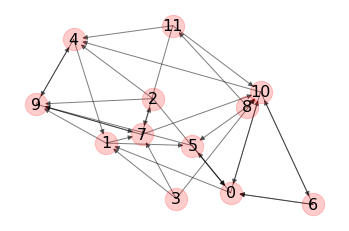

In [630]:
pos = nx.spring_layout(G)  # positions for all nodes
# nodes
nx.draw_networkx_nodes(G, pos,
                       nodelist=G.nodes,
                       node_color='r',
                       node_size=500,
                       alpha=0.2)

nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
labels = dict(zip(list(range(len(G.nodes.values()))), list(range(len(G.nodes.values())))))
nx.draw_networkx_labels(G, pos, labels, font_size=16)

plt.axis('off')
plt.show()

In [608]:
class EDS:
    
    def __init__(G: nx.Graph):
        self.G = G
        self.hashes0 = dict(zip(G.nodes, [[]]*len(G.nodes)))
        self.hashes1 = dict(zip(G.nodes, [[]]*len(G.nodes)))
        self.hashes2 = dict(zip(G.nodes, [[]]*len(G.nodes)))
        
        self.var = {}
        
    @staticmethod
    def trailing_zeroes(a):
        """Counts the number of trailing 0 bits in num."""
        num = mmh3.hash(bytes(a), signed=False, seed=34)
        if num == 0:
            return 32 # Assumes 32 bit integer inputs!
        p = 0
        while (num >> p) & 1 == 0:
            p += 1
        return p

    def compute_neighbor_hashes(lvl: int):
        
        

SyntaxError: unexpected EOF while parsing (<ipython-input-608-47c6308389b7>, line 24)

'00000000000000000000000000001110'

In [585]:
random_quotes = """Don't worry about what anybody else is going to do. The best way to
predict the future is to invent it.
-- Alan Kay
Premature optimization is the root of all evil (or at least most of it)
in programming.
-- Donald Knuth
Lisp has jokingly been called "the most intelligent way to misuse a
computer". I think that description is a great compliment because it
transmits the full flavor of liberation: it has assisted a number of our
most gifted fellow humans in thinking previously impossible thoughts.
-- Edsger Dijkstra, CACM, 15:10
Keep away from people who try to belittle your ambitions. Small people
always do that, but the really great make you feel that you, too, can
become great.
-- Mark Twain
What Paul does, and does very well, is to take ideas and concepts that
are beautiful in the abstract, and brings them down to a real world
level. That's a rare talent to find in writing these days.
-- Jeff "hemos" Bates, Director, OSDN; Co-evolver, Slashdot
Since programmers create programs out of nothing, imagination is our
only limitation. Thus, in the world of programming, the hero is the one
who has great vision. Paul Graham is one of our contemporary heroes. He
has the ability to embrace the vision, and to express it plainly. His
works are my favorites, especially the ones describing language design.
He explains secrets of programming, languages, and human nature that can
only be learned from the hacker experience. This book shows you his
great vision, and tells you the truth about the nature of hacking.
-- Yukihiro "Matz" Matsumoto, creator of Ruby
To follow the path:
    look to the master,
    follow the master,
    walk with the master,
    see through the master,
    become the master.
-- Modern zen Poem
No problem should ever have to be solved twice.
-- Eric S. Raymond, How to become a hacker
Attitude is no substitute for competence.
-- Eric S. Raymond, How to become a hacker
It is said that the real winner is the one who lives in today but able
to see tomorrow.
-- Juan Meng, Reviewing "The future of ideas" by Lawrence Lessig
Fools ignore complexity. Pragmatists suffer it. Some can avoid it.
Geniuses remove it.
-- Alan J. Perlis (Epigrams in programming)
A year spent in artificial intelligence is enough to make one believe in
God.
-- Alan J. Perlis (Epigrams in programming)
Dealing with failure is easy: Work hard to improve. Success is also easy
to handle: You've solved the wrong problem. Work hard to improve.
-- Alan J. Perlis (Epigrams in programmi ng)
Within a computer natural language is unnatural.
-- Alan J. Perlis (Epigrams in programming)
You think you know when you learn, are more sure when you can write,
even more when you can teach, but certain when you can program.
-- Alan J. Perlis (Epigrams in programming)
Adapting old programs to fit new machines usually means adapting new
machines to behave like old ones.
-- Alan J. Perlis (Epigrams in programming)
A little learning is a dangerous thing.
-- Alexander Pope
Computer science education cannot make anybody an expert programmer any
more than studying brushes and pigment can make somebody an expert
painter.
-- Eric Raymond
Einstein argued that there must be simplified explanations of nature,
because God is not capricious or arbitrary.
-- Frederick P. Brooks, No Sliver Bullet.
Students should be evaluated on how well they can achieve the goals they
strived to achieve within a realistic context. Students need to learn to
do things, not know things.
-- Roger Schank, Engines for Education
We remember what we learn when we care about performing better and when
we believe that what we have been asked to do is representative of
reality.
-- Roger Schank, Engines for Education
There really is no learning without doing.
-- Roger Schank, Engines for Education
We really have to get over the idea that some stuff is just worth
knowing even if you never do anything with it. Human memories happily
erase stuff that has no purpose, so why try to fill up children's heads
with such stuff?
-- Roger Schank, Engines for Education
La tactique, c'est ce que vous faites quand il y a quelque chose à
faire; la stratégie, c'est ce que vous faites quand il n'y a rien à
faire.
-- Xavier Tartacover
The only problems we can really solve in a satisfactory manner are those
that finally admit a nicely factored solution.
-- E. W. Dijkstra, The humble programmer
The best way to learn to live with our limitations is to know them.
--E. W. Dijkstra, The humble programmer
This challenge, viz. the confrontation with the programming task, is so
unique that this novel experience can teach us a lot about ourselves. It
should deepen our understanding of the processes of design and creation,
it should give us better control over the task of organizing our
thoughts. If it did not do so, to my taste we should no deserve the
computer at all!  It has allready taught us a few lessons, and the one I
have chosen to stress in this talk is the following. We shall do a much
better programming job, provided that we approach the task with a full
appreciation of its tremenduous difficulty, provided that we stick to
modest and elegant programming languages, provided that we respect the
intrinsec limitations of the human mind and approach the task as Very
Humble Programmers.
-- E. W. Dijkstra, The humble programmer
Ce n'est que par les relations qu'on entretient entre nos différentes
connaissances qu'elles nous restent accessibles.
-- Shnuup, sur l'hypertexte (SELFHTML -> Introduction -> Definitions sur l'hypertexte)
We now come to the decisive step of mathematical abstraction: we forget
about what the symbols stand for. ...[The mathematician] need not be
idle; there are many operations which he may carry out with these
symbols, without ever having to look at the things they stand for.
-- Hermann Weyl, The Mathematical Way of Thinking
An expert is, according to my working definition "someone who doesn't
need to look up answers to easy questions".
-- Eric Lippert.
The programmer must seek both perfection of part and adequacy of
collection.
-- Alan J. Perlis
Thus, programs must be written for people to read, and only incidentally
for machines to execute.
-- Alan J. Perlis
We control complexity by building abstractions that hide details when
appropriate. We control complexity by establishing conventional
interfaces that enable us to construct systems by combining standard,
well-understood pieces in a ``mix and match'' way. We control complexity
by establishing new languages for describing a design, each of which
emphasizes particular aspects of the design and deemphasizes others.
-- Alan J. Perlis
The acts of the mind, wherein it exerts its power over simple ideas, are
chiefly these three: 1. Combining several simple ideas into one compound
one, and thus all complex ideas are made. 2. The second is bringing two
ideas, whether simple or complex, together, and setting them by one
another so as to take a view of them at once, without uniting them into
one, by which it gets all its ideas of relations. 3. The third is
separating them from all other ideas that accompany them in their real
existence: this is called abstraction, and thus all its general ideas
are made.
-- John Locke, An Essay Concerning Human Understanding (1690)
Lisp programmers know the value of everything but the cost of nothing.
-- Alan J. Perlis
An interpreter raises the machine to the level of the user program; a
compiler lowers the user program to the level of the machine language.
-- SICP
Everything should be made as simple as possible, but no simpler.
-- Albert Einstein
The great dividing line between success and failure can be expressed in
five words: "I did not have time."
-- WestHost weekly newsletter 14 Feb 2003
When your enemy is making a very serious mistake, don't be impolite and
disturb him.
-- Napoleon Bonaparte (allegedly)
A charlatan makes obscure what is clear; a thinker makes clear what is
obscure.
-- Hugh Kingsmill
There are two ways of constructing a software design; one way is to make
it so simple that there are obviously no deficiencies, and the other way
is to make it so complicated that there are no obvious deficiencies. The
first method is far more difficult.
-- C. A. R. Hoare
And if you go too far up, abstraction-wise, you run out of oxygen.
Sometimes smart thinkers just don't know when to stop, and they create
these absurd, all-encompassing, high-level pictures of the universe that
are all good and fine, but don't actually mean anything at all.
-- Joel Spolsky		
The three chief virtues of a programmer are: Laziness, Impatience and
Hubris.
-- Larry Wall (Programming Perl)
All non-trivial abstractions, to some degree, are leaky.
-- Joel Spolsky (The Law of Leaky Abstractions)
XML wasn't designed to be edited by humans on a regular basis.
-- Guido van Rossum
Premature abstraction is an equally grevious sin as premature
optimization.
-- Keith Devens
You can have premature generalization as well as premature optimization.
-- Bjarne Stroustrup
He causes his sun to rise on the evil and the good, and sends rain on
the righteous and the unrighteous.
-- Matthew 5:45
A language that doesn't affect the way you think about programming, is
not worth knowing.
-- Alan Perlis
Je n'ai fait celle-ci plus longue que parce que je n'ai pas eu le loisir
de la faire plus courte. (I have made this letter so long only because I
did not have the leisure to make it shorter.)
-- Blaise Pascal (Lettres Provinciales)
Men never do evil so completely and cheerfully as when they do it from
religious conviction.
-- Blaise Pascal (attributed)
Everybody makes their own fun. If you don't make it yourself, it ain't
fun -- it's entertainment.
-- David Mamet (as relayed by Joss Whedon)
If we wish to count lines of code, we should not regard them as *lines
produced* but as *lines spent*.
-- Edsger Dijkstra		
Sometimes a man with too broad a perspective reveals himself as having
no real perspective at all. A man who tries too hard to see every side
may be a man who is trying to avoid choosing any side. A man who tries
too hard to seek a deeper truth may be trying to hide from the truth he
already knows.  That is not a sign of intellectual sophistication and
"great thinking". It is a demonstration of moral degeneracy and
cowardice.
-- Steven Den Beste
Omit needless words.
-- William Strunk, Jr. (The Elements of Style)
I have never met a man so ignorant that I couldn't learn something from
him.
-- Galileo Galilei
A society that puts equality -- in the sense of equality of outcome --
ahead of freedom will end up with neither equality nor freedom. The use
of force to achieve equality will destroy freedom, and the force,
introduced for good purposes, will end up in the hands of people who use
it to promote their own interests.
-- Milton Friedman (Thomas Sowell: A Conflict of Visions, p130)
Philosophy: the finding of bad reasons for what one believes by
instinct.
-- Brave New World (paraphrased)
Of all tyrannies a tyranny sincerely exercised for the good of its
victims may be the most oppressive. It may be better to live under
robber barons than under omnipotent moral busybodies, The robber baron's
cruelty may sometimes sleep, his cupidity may at some point be satiated;
but those who torment us for own good will torment us without end, for
they do so with the approval of their own conscience.
-- C.S. Lewis
Fools! Don't they know that tears are a woman's most effective weapon?
-- Catwoman (The Batman TV Series, episode 83)
It's like a condom; I'd rather have it and not need it than need it and
not have it.
-- some chick in Alien vs. Predator, when asked why she
always carries a gun
C++ is history repeated as tragedy. Java is history repeated as farce.
-- Scott McKay
Simplicity takes effort-- genius, even.
-- Paul Graham
Show, don't tell.
-- unknown
In God I trust; I will not be afraid. What can mortal man do to me?
-- David (Psalm 56:4)
Linux is only free if your time has no value.
-- Jamie Zawinski
Code is poetry.
-- wordpress.org
If you choose not to decide, you still have made a choice.
-- Rush (Freewill)
Civilization advances by extending the number of important operations
which we can perform without thinking about them.
-- Alfred North Whitehead (Introduction to Mathematics)		
The function of wisdom is to discriminate between good and evil.
-- Cicero
The reason to do animation is caricature. Good caricature picks out the
essense of the statement and removes everything else. It's not simply
about reproducing reality; It's about bumping it up.
-- Brad Bird, writer and director, The Incredibles
Mistakes were made.
-- Ronald Reagan
I would rather be an optimist and be wrong than a pessimist who proves
to be right. The former sometimes wins, but never the latter.
-- "Hoots"
What is truth?
-- Pontius Pilate
Life moves pretty fast. If you don't stop and look around once in a
while, you could miss it.
-- Ferris Bueller
Lisp is worth learning for the profound enlightenment experience you
will have when you finally get it; that experience will make you a
better programmer for the rest of your days, even if you never actually
use Lisp itself a lot.
-- Eric S. Raymond
Any sufficiently complicated C or Fortran program contains an ad hoc,
informally specified, bug-ridden, slow implementation of half of Common
Lisp.
-- Philip Greenspun (Greenspun's Tenth Rule)
I was talking recently to a friend who teaches at MIT. His field is hot
now and every year he is inundated by applications from would-be
graduate students. "A lot of them seem smart," he said. "What I can't
tell is whether they have any kind of taste."
-- Paul Graham
The direct pursuit of happiness is a recipe for an unhappy life.
-- Donald Campbell
It's no trick for talented people to be interesting, but it's a gift to
be interested. We want an organization filled with interested people.
-- Randy S. Nelson (dean of Pixar University)
Why teach drawing to accountants? Because drawing class doesn't just
teach people to draw. It teaches them to be more observant. There's no
company on earth that wouldn't benefit from having people become more
observant.
-- Randy S. Nelson (dean of Pixar University)
All problems in computer science can be solved by another level of
indirection.
-- Butler Lampson	
A designer knows he has arrived at perfection not when there is no
longuer anything to add, but when there is no longuer anything to take
away.
-- Antoine de St Exupery.
For the things we have to learn before we can do them, we learn by doing
them.
-- Aristotle.
There are many ways to avoid success in life, but the most sure-fire
just might be procrastination.
-- Hara Estroff Marano.
PI seconds is a nanocentury.
-- [fact]
A non negative binary integer value x is a power of 2 iff (x & (x-1)) is
0 using 2's complement arithmetic.
-- [fact]
While I’ve always appreciated beautiful code, I share Jonathan’s concern
about studying it too much. I think studying beauty in music and
painting has led us to modern classical music and painting that the
majority of us just don’t get. Beauty can be seen when it emerges, but
isn’t something to strive for in isolation of a larger context. In the
software world, the larger context would be the utility of the software
to the end user.
-- [A comment on a blog]
Dont give users the opportunity to lock themselves.
-- unknown
Any fool can make the simple complex, only a smart person can make the
complex simple.
-- unknown
To do something well you have to love it. So to the extent you can
preserve hacking as something you love, you're likely to do it well. Try
to keep the sense of wonder you had about programming at age 14. If
you're worried that your current job is rotting your brain, it probably
is.
-- Paul Graham.
- If you give him a penny for his thoughts, you'd get change.
- Not the sharpest knife in the drawer.
- A prime candidate for natural deselection.
-- [Ideas for flamewars]
What I didn't understand was that the value of some new acquisition
wasn't the difference between its retail price and what I paid for it.
It was the value I derived from it. Stuff is an extremely illiquid
asset. Unless you have some plan for selling that valuable thing you got
so cheaply, what difference does it make what it's "worth?" The only way
you're ever going to extract any value from it is to use it. And if you
don't have any immediate use for it, you probably never will.
-- Paul Graham
Only bad designers blame their failings on the users.
-- unknown
Humans aren't rational -- they rationalize. And I don't just mean "some
of them" or "other people". I'm talking about everyone. We have a "logic
engine" in our brains, but for the most part, it's not the one in the
driver's seat -- instead it operates after the fact, generating
rationalizations and excuses for our behavior.
-- Paul Buchheit
What do Americans look for in a car? I've heard many answers when I've
asked this question. The answers include excellent safety ratings, great
gas mileage, handling, and cornering ability, among others. I don't
believe any of these. That's because the first principle of the Culture
Code is that the only effective way to understand what people truly mean
is to ignore what they say. This is not to suggest that people
intentionally lie or misrepresent themselves. What it means is that,
when asked direct questions about their interests and preferences,
people tend to give answers they believe the questioner wants to hear.
Again, this is not because they intend to mislead. It is because people
respond to these questions with their cortexes, the parts of their
brains that control intelligence rather than emotion or instinct. They
ponder a question, they process a question, and when they deliver an
answer, it is the product of deliberation. They believe they are telling
the truth. A lie detector would confirm this. In most cases, however,
they aren't saying what they mean.
-- The culture code.
When all you have is a hammer, everything looks like a nail.
-- unknown
Good coders code, great reuse.
-- http://www.catonmat.net
The lesson of the story might appear to be that self-interested and
ambitious people in power are often the cause of wastefulness in
developing countries. But self-interested and ambitious people are in
positions of power, great and small, all over the world. In many places,
they are restrained by the law, the press, and democratic opposition.
Cameroon's tragedy is that there is nothing to hold self-interest in
check.
-- Tim Harford
To solve your problems you must learn new skills, adapt new thought
patterns, and become a different person than you were before that
problem.  God has crafted you for success. In the middle of every
adversity lie your best opportunities. Discover it, build upon it and
move forward in your journey to live an extraordinary life.  You owe it
to yourself to live a great life. Don’t let negative thoughts pull you
down. Be grateful and open to learn and grow.
-- http://secretsofstudying.com/
If there is a will, there is a way.
-- unknown
Having large case statements in an object-oriented language is a sure
sign your design is flawed.
-- [Fixing architecture flaws in Rails' ORM]
Being a programmer is the same way. The only way to be a good programmer
is to write code. When you realize you haven't been writing much code
lately, and it seems like all you do is brag about code you wrote in the
past, and people start looking at you funny while you're shooting your
mouth off, realize it's because they know. They might not even know they
know, but they know. So, yes, doing what you love brings success, and by
all means, throw yourself a nice big party, buy yourself a nice car,
soak up the adulation of an adoring crowd. Then shut the fuck up and get
back to work.
-- Sincerity Theory
Another feature about this guy is his low threshold of boredom. He'll
pick up on a task and work frantically at it, accomplishing wonders in a
short time and then get bored and drop it before its properly finished.
He'll do nothing but strum his guitar and lie around in bed for several
days after.  Thats also part of the pattern too; periods of frenetic
activity followed by periods of melancholia, withdrawal and inactivity.
This is a bipolar personality.
-- The bipolar lisp programmer
My dream is that people adopt it on its own merits. We're not trying to
bend Ruby on Rails to fit the enterprise, we're encouraging enterprises
to bend to Ruby on Rails. Come if you like it, stay away if you don't.
We're not going head over heels to accommodate the enterprise or to lure
them away from Java. That's how you end up with Java, if you start
bending to special interest groups.
-- David Heinemeier Hansson (Ruby On Rails' creator)
New eyes have X-ray vision.  [someone that hasn't written it is more
likely to spot the bug. "someone" can be you after a break]
-- William S. Annis
So - what are the most important problems in software engineering? I’d
answer “dealing with complexity”.
-- Mark Chu-Carroll
So the mere constraint of staying in regular contact with us will push
you to make things happen, because otherwise you'll be embarrassed to
tell us that you haven't done anything new since the last time we
talked.
-- Paul Graham (a talk at Y Combinator, for startup creators).
The choice of the university is mostly important for the piece of paper
you get at the end. The education you get depends on you.
-- Andreas Zwinkau
Remember that you are humans in the first place and only after that
programmers.
-- Alexandru Vancea
Humans differ from animals to the degree that they are not merely an end
result of their conditioning, but are able to reflect on their
experiences and strategies, and apply insight to make changes in the way
they live to modify the outcome.
-- SlideTrombone (comment on "Programming can ruin your life")
As builders and creators finding the perfect solution should not be our
main goal. We should find the perfect problem.
-- Isaac (blog comment)
Just like carpentry, measure twice cut once.
-- Super-sizing YouTube with Python (Mike Solomon, mike@youtube.com)
The good thing about reinventing the wheel is that you get a round one.
-- Douglas Crockford (Author of JSON and JsLint)
I feel it is everybodies obligation to reach for the best in themselves
and use that for the interest of mankind.
-- Corneluis (comment on 'Are you going to change the world? (Really?)')
Abstraction is a form of data compression: absolutely necessary, because
human short-term memory is so small, but the critically important aspect
of abstraction is the algorithm that gets you from the name back to the
"uncompressed" details.
-- Bruce Wilder (blog post comment)
Have you ever noticed that when you sit down to write something, half
the ideas that end up in it are ones you thought of while writing it?
The same thing happens with software. Working to implement one idea
gives you more ideas.
-- Paul Graham, The other road ahead.
In general, we can think of data as defined by some collection of
selectors and constructors, together with specified conditions that
these procedures must fulfill in order to be a valid representation.
-- SICP, What is meant by data?
Resume writing is just like dating, or applying for a bank loan, in that
nobody wants you if you're desperate.
-- Steve Yegge.
Mastering isn’t a survival instinct; it’s an urge to excel. Mastering is
one of the experiences that delineates us from animals. It is striving
to be more tomorrow than we are today; to perfectly pitch the ball over
home plate; to craft the perfect sentence in an article; to open the
oven and feel the warm, richly-scented cloud telling you dinner is going
to be absolutely extraordinary. We humans crave perfection, to be
masters of our domain, to distinguish ourselves by sheer skill and
prowess.
-- Joesgoals.com
It(mastering)’s knowing what you are doing.
-- Joesgoals.com
Well then. How could you possibly live without automated refactoring
tools? How else could you coordinate the caterpillar-like motions of all
Java’s identical tiny legs, its thousands of similar parts?
I’ll tell you how:
Ruby is a butterfly.
-- Stevey, Refactoring Trilogy, Part 1.
You will never become a Great Programmer until you acknowledge that you
will always be a Terrible Programmer.
You will remain a Great Programmer for only as long as you acknowledge
that you are still a Terrible Programmer.
-- Marc (http://kickin-the-darkness.blogspot.com/)
If I tell you I'm good, you would probably think I'm boasting. If I tell
you I'm no good, you know I'm lying.
-- Bruce Lee
Let me try to get this straight: Lisp is a language for describing
algorithms. This was JohnMcCarthy's original purpose, anyway: to build
something more convenient than a Turing machine. Lisp is not about file,
socket or GUI programming - Lisp is about expressive power. (For
example, you can design multiple object systems for Lisp, in Lisp. Or
implement the now-fashionable AOP. Or do arbitrary transformations on
parsed source code.) If you don't value expressive power, Lisp ain't for
you. I, personally, would prefer Lisp to not become mainstream: this
would necessarily involve a dumbing down.
-- VladimirSlepnev
Je ne vous impose aucune contrainte, aucune limite. Surprenez-moi,
étonnez-moi, défiez-moi, défiez-vous vous-même. Vous avez le choix: vous
pouvez rester dans l'ombre ou en sortir en étant parmis les trop rares
exceptions à avoir réussi. L'heure est venue d'aller bien au delà de
votre potentiel. L'heure est venue maintenant de descendre vraiment en
vous. L'heure est venue de démontrer pourquoi vous êtes l'élite, les
quelques élus, les rares lueurs qui offrent à cette compagnie son
caractère exceptionnel, sa luminescence.
-- Le PDG de NURV, dans "Anti-trust".
If something isn’t working, you need to look back and figure out what
got you excited in the first place.
-- David Gorman (ImThere.com)
Opportunities that present themselves to you are the consequence -- at
least partially -- of being in the right place at the right time. They
tend to present themselves when you're not expecting it -- and often
when you are engaged in other activities that would seem to preclude you
from pursuing them. And they come and go quickly -- if you don't jump
all over an opportunity, someone else generally will and it will vanish.
-- Marc Andreessen (http://blog.pmarca.com/)
Pay attention to opportunity cost at all times. Doing one thing means
not doing other things. This is a form of risk that is very easy to
ignore, to your detriment.
-- Marc Andreessen (http://blog.pmarca.com/)
Seize any opportunity, or anything that looks like opportunity. They are
rare, much rarer than you think...
-- Nassim Nicholas Taleb, "The Black Swan".
I think that a lot of programmers are ignoring an important point when
people talk about reducing code repetition on large projects.
Part of the idea is that large projects are intrinsically *wrong*. That
you should be looking at making a number of smaller projects that are
composable, even if you never end up reusing one of those smaller
projects elsewhere.
-- Dan Nugent
We tend to seek easy, single-factor explanations of success. For most
important things, though, success actually requires avoiding many
separate causes of failure.
-- Jared Diamond
Things which matter most must never be at the mercy of things which
matter least.
-- Johann Wolfgang Von Goethe (1749-1832)
I think the root of your mistake is saying that macros don't scale to
larger groups. The real truth is that macros don't scale to stupider
groups.
-- Paul Graham, on the Lightweight Languages mailing list.
Argue with idiots, and you become an idiot.
If you compete with slaves you become a slave.
-- Paul Graham and Norbert Weiner, respectively
Always dive down into a problem and get your hands on the deepest issue
behind the problem. All other considerations are to dismissed as
"engineering details"; they can be sorted out after the basic problem
has been solved.
-- Chris Crawford
Don't have good ideas if you aren't willing to be responsible for them.
-- Alan Perlis
It is impossible to sharpen a pencil with a blunt axe. It is equally
vain to try to do it with ten blunt axes instead. 
-- Edsger Dijkstra
If we wish to count lines of code, we should not regard them as lines
produced but as lines spent.
-- Edsger Dijkstra
The most damaging phrase in the language is, It's always been done that
way.
-- Rear Admiral Grace Hopper
Getting back to failing early, I've learned it's important to completely
fail. Get fired. Shoot the project, then burn its corpse. Melt the CVS
repository and microwave the backup CDs. When things go wrong, I've
often tried to play the hero from start to finish. Guess what? Some
projects are doomed no matter what. Some need skills I don't possess.
And some need a fresh face.
-- Reginald Braithwaite
The only thing a man should ever be 100% convinced of is his own
ignorance.
-- DJ MacLean
The best people and organizations have the attitude of wisdom: The
courage to act on what they know right now and the humility to change
course when they find better evidence.
The quest for management magic and breakthrough ideas is overrated;
being a master of the obvious is underrated.
Jim Maloney is right: Work is an overrated activity
-- Bob Sutton
In theory, there’s no difference between theory and practice. But in
practice, there is.
-- Albert Einstein
Act from reason, and failure makes you rethink and study harder.
Act from faith, and failure makes you blame someone and push harder.
--  Erik Naggum
Measure everything you can about the product, and you'll start seeing
patterns.
-- Max Levchin, PayPal founder, Talk at StartupSchool2007
Something Confusing about "Hard":
It's tempting to think that if it's hard, then it's valuable.
Most valuable things are hard.
Most hard things are completely useless -- (picture of someone smashing
their head through concrete blocks kung-fu style).
Hard DOES NOT EQUATE TO BEING valuable.
Remember Friendster back in the day?
You'd sign in, invite friends, have 25 friends, go to their profile, and
then it'd show how you were connected to each one.
That's an impressive [some geeky CS jargon] Cone traversal of a tree -
100 million string comparisons per page -- it won't scale.
Used to take a minute per page to load, and Friendster died a painful
death.
MySpace -- not interested in solving problems
They use the shortcut of "Miss Fitzpatrick is in your extended network"
(i.e. even when you're not even signed up for MySpace)
They didn't solve the hard problem. But they make the more relevant
assumption that you want to be connected to hot women. [LOL]
Shows Alexa graph showing that in early 2005 Myspace took off, and
quickly bypassed Friendster and never looked back.
-- Max Levchin, PayPal founder, Talk at StartupSchool2007
Quality of the people is better than the quality of the business idea.
Crappy people can screw up the best idea in the world.
-- Hadi Partovi & Ali Partovi (iLike.com), Talk at StartupSchool2007
The only constant in the world of hi-tech is change.
-- Mark Ward
Write it properly first. It's easier to make a correct program fast,
than to make a fast program correct.
-- http://www.cpax.org.uk/prg/
J'ai toujours préféré la folie des passions à la sagesse de
l'indifférence.
-- Anatole France
You can’t get to version 500 if you don’t start with a version 1.
-- BetterExplained.com
The wonderful and frustrating thing about understanding yourself is that
nobody can do it for you.
-- BetterExplained.com
When you have eliminated the impossible, whatever remains, however
improbable, must be the truth.
-- Sherlock Holmes
In order to understand what another person is saying, you must assume
that it is true and try to find out what it could be true of.
-- George Miller
A journey of a thousand miles must begin with a single step.
-- Lao­Tzu
C’s great for what it’s great for.
-- Ben Hoyts (micropledge)
There is one meaning [for static in C]: a global variable that is
invisible outside the current scope, be it a function or a file.
-- Paolo Bonzini
Processors don't get better so that they can have more free time.
Processors get better so _you_ can have more free time.
-- LeCamarade (freeshells.ch)
The venerable master Qc Na was walking with his student, Anton.  Hoping to
prompt the master into a discussion, Anton said "Master, I have heard that
objects are a very good thing - is this true?"  Qc Na looked pityingly at
his student and replied, "Foolish pupil - objects are merely a poor man's
closures."
    Chastised, Anton took his leave from his master and returned to his cell,
intent on studying closures.  He carefully read the entire "Lambda: The
Ultimate..." series of papers and its cousins, and implemented a small
Scheme interpreter with a closure-based object system.  He learned much, and
looked forward to informing his master of his progress.
    On his next walk with Qc Na, Anton attempted to impress his master by
saying "Master, I have diligently studied the matter, and now understand
that objects are truly a poor man's closures."  Qc Na responded by hitting
Anton with his stick, saying "When will you learn? Closures are a poor man's
object."  At that moment, Anton became enlightened.
-- Anton van Straaten (Na = Norman Adams, Qa = Christian Queinnec)
Understanding why C++ is the way it is helps a programmer use it well. A deep
understanding of a tool is essential for an expert craftsman.
-- Bjarne Stroustrap
No art, however minor, demands less than total dedication if you want to
excel in it.
-- Alberti
The minute you put the blame on someone else you’ve switch things from
being a problem you can control to a problem outside of your control.
-- engtech (internetducttape.com)
State is the root of all evil. In particular functions with side effects
should be avoided.
-- OO Sucks (bluetail.com)
Ils ne sont pas forts parce qu'ils sont forts. Ils sont forts parce que
nous sommes faibles.
-- Ragala Khalid
It is better to be quiet and thought a fool than to open your mouth and
remove all doubt.
-- WikiHow
A tail call allows a function to return the result of another function
without leaving an entry on the stack. Tail recursion is a specific case
of tail calling.
-- ASPN : Python Cookbook : Explicit Tail Call
Simplicity means the achievement of maximum effect with minimum means.
-- Dr. Koichi Kawana
Normality is the route to nowhere.
-- Ridderstrale & Nordstorm, Funky Business
The problem is that Microsoft just has no taste. And I don't mean that
in a small way, I mean that in a big way.
-- Steve Jobs
Do you want to sell sugared water all your life or do you want to change
the world?
-- Steve Jobs, to John Sculley (former Pepsi executive)
1 - Creativity and innovation always build on the past.
2 - The past always tries to control the creativity that builds on it.
3 - Free societies enable the future by limiting the past.
4 - Ours is less and less a free society.
-- Lawrence Lessig, Free Culture.
Good work is no done by ‘humble’ men.
-- H. Hardy, A mathematician's apology.
Simplicity and pragmatism beat complexity and theory any day.
-- Dennis (blog comment)
The proof is by reductio ad absurdum, and reductio ad absurdum, which
Euclid loved so much, is one of a mathematician’s finest weapons. It is
a far finer gambit than any chess gambit: a chess player may offer the
sacrifice of a pawn or even a piece, but a mathematician offers the
game.
-- G. H. Hardy
Remember, always be yourself ... unless you suck!
-- Joss Whedon
All great things require great dedication.
-- Chuck Norris(?)
I'm always happy to trade performance for readability as long as the
former isn't already scarce.
-- Crayz (Commentor on blog.raganwald.com)
You have to write for your audience. I would never write (1..5).map
&'*2' in Java when I could write
ListFactoryFactory.getListFactoryFromResource(
    new ResourceName('com.javax.magnitudes.integers').
setLowerBound(1).setUpperBound(5).setStep(1).applyFunctor(
    new Functor () { public void eval (x) { return x * 2; } }))
I'm simplifying, of course, I've left out the security and logging
wrappers.
-- Reginald Braithwait
The definition of insanity is doing the same thing over and over again
and expecting different results.
-- Benjamin Franklin
A no uttered from the deepest conviction is better than a yes merely
uttered to please or what is worse, to avoid trouble.
-- Mahatma Gandhi
I think it is wise, and only honest, to warn you that my goal is
immodest. It is not my purpose to "transfer knowledge" to you that,
subsequently, you can forget again. My purpose is no less than to
effectuate in each of you a noticeable, irreversable change. I want you
to gain, for the rest of your lives, the insight that beautiful proofs
are not "found" by trial anf error but are the result of a consciously
applied design discipline. I want you to raise your quality standards. I
mean, if 10 years from now, when you are doing something quick and
dirty, you suddenly visualize that I am looking over your shoulders and
say to yourself "Dijkstra would not have liked this", well, that would
be enough immortality for me.
-- E. W. Dijkstra
The general principle for complexity design is this: Think locally, act
locally.
-- Richard P. Gabriel & Ron Goldman, Mob Software: The Erotic Life of Code
Programming is the art of figuring out what you want so precisely that
even a machine can do it.
-- Some guy who isn't famous
Hence my urgent advice to all of you to reject the morals of the
bestseller society and to find, to start with, your reward in your own
fun. This is quite feasible, for the challenge of simplification is so
fascinating that, if we do our job properly, we shall have the greatest
fun in the world.
-- E. W. Dijkstra, On the nature of computing science.
Remember: you are alone. Every time you can get help from someone,
it is an opportunity: you should eagerly size it. But then, promptly
return to normal mode: you are alone and you must be prepared to solve
every problem yourself.
-- Eric KEDJI
Making All Software Into Tools Reduces Risk.
-- smoothspan.com
Some may say Ruby is a bad rip-off of Lisp or Smalltalk, and I admit
that. But it is nicer to ordinary people.
-- Matz, LL2
C and Lisp stand at opposite ends of the spectrum; they're each great at
what the other one sucks at.
-- Steve Yegge, Tour de Babel.
Two people should stay together if together they are better people than
they would be individually.
-- ?
To the optimist, the glass is half full. To the pessimist, the glass is
half empty. To the engineer, the glass is twice as big as it needs to
be.
-- author unknown (quoted in `Robust Systems', Gerald Jay Suseman)
It is practically impossible to teach good programming to students that
have had a prior exposure to BASIC: as potential programmers they are
mentally mutilated beyond hope of regeneration.
-- Edsger Dijkstra
Whatever is worth doing at all, is worth doing well.
-- Earl of Chesterfield
Rules of Optimization:
Rule 1: Don’t do it.
Rule 2 (for experts only): Don’t do it yet.
-- M.A. Jackson
More computing sins are committed in the name of efficiency (without
necessarily achieving it) than for any other single reason - including
blind stupidity.
-- W.A. Wulf
We should forget about small efficiencies, say about 97% of the time:
premature optimization is the root of all evil.
-- Donald Knuth
The best is the enemy of the good.
-- Voltaire
The job of a leader today is not to create followers. It’s to create
more leaders.
-- Ralph Nader
The president was visiting NASA headquarters and stopped to talk to a
man who was holding a mop. “And what do you do?” he asked. The man, a
janitor, replied, “I’m helping to put a man on the moon, sir.”
-- The little book of leadership
Only make new mistakes.
-- Phil Dourado
You can recognize truth by its beauty and simplicity. When you get it
right, it is obvious that it is right.
-- Richard Feynman
Talkers are no good doers.
-- William Shakespeare, "Henry VI"
Photography is painting with light.
-- Eric Hamilton
Good artists copy. Great artists steal.
-- Pablo Picasso
A guideline in the process of stepwise refinement should be the
principle to decompose decisions as much as possible, to untangle
aspects which are only seemingly interdependent, and to defer those
decisions which concern details of representation as long as possible.
-- Niklaus Wirth
Vigorous writing is concise. A sentence should contain no unnecessary
words, a paragraph no unnecessary sentences, for the same reason that a
drawing should have no unnecessary lines and a machine no unnecessary
parts. This requires not that the writer make all sentences short or
avoid all detail and treat subjects only in outline, but that every word
tell.
-- William Strunk, Jr. (The Elements of Style)
The problem is that small examples fail to convince, and large examples
are too big to follow.
-- Steve Yegge.
We are the sum of our behaviours; excellence therefore is not an act but
a habit.
-- Aristotle.
The purpose of abstraction is not to be vague, but to create a new
semantic level in which one can be absolutely precise.
-- Edsger Dijkstra
Every man prefers belief to the exercise of judgment.
-- Seneca
It’s hard to grasp abstractions if you don’t understand what they’re
abstracting away from.
-- Nathan Weizenbaum
That is one of the most distinctive differences between school and the
real world: there is no reward for putting in a good effort. In fact,
the whole concept of a "good effort" is a fake idea adults invented to
encourage kids. It is not found in nature.
-- Paul Graham
I find that the harder I work, the more luck I seem to have.
-- Thomas Jefferson
Don't stay in bed, unless you can make money in bed.
-- George Burns
If everything seems under control, you're not going fast enough.
-- Mario Andretti
Chance favors the prepared mind.
-- Louis Pasteur
Controlling complexity is the essence of computer programming.
-- Brian Kernigan
The function of good software is to make the complex appear to be
simple.
-- Grady Booch
Programmers are in a race with the Universe to create bigger and better
idiot-proof programs, while the Universe is trying to create bigger and
better idiots.  So far the Universe is winning.
-- Rich Cook
A hacker on a roll may be able to produce–in a period of a few
months–something that a small development group (say, 7-8 people) would
have a hard time getting together over a year.  IBM used to report that
certain programmers might be as much as 100 times as productive as other
workers, or more.
-- Peter Seebach
The best programmers are not marginally better than merely good ones.
They are an order-of-magnitude better, measured by whatever standard:
conceptual creativity, speed, ingenuity of design, or problem-solving
ability.
-- Randall E. Stross
A great lathe operator commands several times the wage of an average
lathe operator, but a great writer of software code is worth 10,000
times the price of an average software writer.
-- Bill Gates
Measuring programming progress by lines of code is like measuring
aircraft building progress by weight.
-- Bill Gates
First learn computer science and all the theory.  Next develop a
programming style.  Then forget all that and just hack.
-- George Carrette
To iterate is human, to recurse divine.
-- L. Peter Deutsch
The best thing about a boolean is even if you are wrong, you are only
off by a bit.
-- Anonymous
Should array indices start at 0 or 1?  My compromise of 0.5 was rejected
without, I thought, proper consideration.
-- Stan Kelly-Bootle
The use of COBOL cripples the mind; its teaching should therefore be
regarded as a criminal offense.
-- E.W. Dijkstra
It is practically impossible to teach good programming style to students
that have had prior exposure to BASIC.  As potential programmers, they
are mentally mutilated beyond hope of regeneration.
-- E. W. Dijkstra
One of the main causes of the fall of the Roman Empire was that–lacking
zero–they had no way to indicate successful termination of their C
programs.
-- Robert Firth
Saying that Java is nice because it works on all OSes is like saying
that anal sex is nice because it works on all genders.
-- Alanna
If Java had true garbage collection, most programs would delete
themselves upon execution.
-- Robert Sewell
Software is like sex: It’s better when it’s free.
-- Linus Torvalds
Any code of your own that you haven’t looked at for six or more months
might as well have been written by someone else.
-- Eagleson’s Law
Good programmers use their brains, but good guidelines save us having to
think out every case.
-- Francis Glassborow
Considering the current sad state of our computer programs, software
development is clearly still a black art, and cannot yet be called an
engineering discipline.
-- Bill Clinton
If debugging is the process of removing bugs, then programming must be
the process of putting them in.
-- Edsger W. Dijkstra
Always code as if the guy who ends up maintaining your code will be a
violent psychopath who knows where you live.
-- Martin Golding
Everything that can be invented has been invented.
-- Charles H. Duell, Commissioner, U.S. Office of Patents, 1899
I think there’s a world market for about 5 computers.
-- Thomas J. Watson, Chairman of the Board, IBM, circa 1948
It would appear that we have reached the limits of what it is possible
to achieve with computer technology, although one should be careful with
such statements, as they tend to sound pretty silly in 5 years. 
-- John Von Neumann, circa 1949
But what is it good for?
-- Engineer at the Advanced Computing Systems Division of IBM,
commenting on the microchip, 1968
There is no reason for any individual to have a computer in his home.
-- Ken Olson, President, Digital Equipment Corporation, 1977
640K ought to be enough for anybody.
-- Bill Gates, 1981
Windows NT addresses 2 Gigabytes of RAM, which is more than any
application will ever need.
-- Microsoft, on the development of Windows NT, 1992
We will never become a truly paper-less society until the Palm Pilot
folks come out with WipeMe 1.0.
-- Andy Pierson
If it keeps up, man will atrophy all his limbs but the push-button
finger.
-- Frank Lloyd Wright
Functional programming is like describing your problem to a
mathematician.  Imperative programming is like giving instructions to
an idiot.
-- arcus, #scheme on Freenode
Its a shame that the students of our generation grew up with windows and
mice because that tainted our mindset not to think in terms of powerful
tools. Some of us are just so tainted that we will never recover.
-- Jeffrey Mark Siskind <qobi@research.nj.nec.com> in comp.lang.lisp
Lisp is a programmable programming language.
-- John Foderaro
I guess, when you're drunk, every woman looks beautiful and every
language looks (like) a Lisp :)
-- Lament, #scheme@freenode.net
Many of life's failures are people who did not realize how close they
were to success when they gave up.
-- Thomas Edison
You must always work not just within but below your means. If you can
handle three elements, handle only two. If you can handle ten, then
handle five. In that way the ones you do handle, you handle with more
ease, more mastery and you create a feeling of strength in reserve.
-- Pablo Picasso
When you’ve got the code all ripped apart, it’s like a car that’s all
disassembled. You’ve got all the parts tying all over your garage and
you have to replace the broken part or the car will never run. It’s not
fun until the code gets back to the baseline again.
-- Gary Kildall (inventor of CP/M, one of the first OS for the micro).
Well, if you talk about programming to a group of programmers who use
the same language, they can become almost evangelistic about the
language. They form a tight-knit community, hold to certain beliefs, and
follow certain rules in their programming. It’s like a church with a
programming language for a Bible.
-- Gary Kildall (inventor of CP/M, one of the first OS for the micro).
It’s a problem if the design doesn’t let you add features at a later
date. If you have to redo a program, the hours you spend can cause you
to lose your competitive edge. A flexible program demonstrates the
difference between a good designer and someone who is just getting a
piece of code out.
-- Gary Kildall (inventor of CP/M, one of the first OS for the micro).
[How friendly will this machine be?] Well, I don’t think it’s a matter
of friendliness, because ultimately if the program is going to
accomplish anything of value, it will probably be relatively complex.
-- Gary Kildall (inventor of CP/M, one of the first OS for the micro).
Some people suggest that machines would be friendlier if input could be
in a natural language. But natural language is probably the worst kind
of input because it can be quite ambiguous. The process of retrieving
information from the computer would be so time-consuming that you would
be better off spending that time getting the information directly from
an expert.
-- Gary Kildall (inventor of CP/M, one of the first OS for the micro).
The only way of discovering the limits of the possible is to venture a
little way past them into the impossible.
-- Arthur C. Clarke
Any sufficiently advanced technology is undistinguishable from magic.
-- Arthur C. Clarke
That is the inevitable human response. We’re reluctant to believe that
great discoveries are in the air. We want to believe that great
discoveries are in our heads—and to each party in the multiple the
presence of the other party is invariably cause for suspicion.
-- Malcolm Gladwell, Who says big ideas are rare? 
Good ideas are out there for anyone with the wit and the will to find
them.
-- Malcolm Gladwell, Who says big ideas are rare?
A person won't become proficient at something until he or she has done
it many times. In other words., if you want someone to be really good at
building a software system, he or she will have to have built 10 or more
systems of that type.
-- Philip Greenspun
A person won't retain proficiency at a task unless he or she has at one
time learned to perform that task very rapidly. Learning research
demonstrates that the skills of people who become accurate but not fast
deteriorate much sooner than the skills of people who become both
accurate and fast.
-- Philip Greenspun
Training research shows that if you get speed now you can get quality
later. But if you don't get speed you will never get quality in the long
run.
-- Philip Greenspun
Beware of bugs in the above code; I have only proved it correct, not
tried it.
-- Donald Knuth
Wear your best for your execution and stand dignified. Your last
recourse against randomness is how you act — if you can’t control
outcomes, you can control the elegance of your behaviour. You will
always have the last word.
-- Nassim Taleb
The human brain starts working the moment you are born and never stops
until you stand up to speak in public.
-- Anonymous
The trouble with the world is that the stupid are always cocksure and
the intelligent are always filled with doubt.
-- Bertrand Russell
Simple, clear purpose and principles give rise to complex, intelligent
behavior. Complex rules and regulations give rise to simple, stupid
behavior.
-- Dee Hock, Birth of the Chaordic Age
C++ is like teenage sex: Everybody is talking about it all the time,
only few are really doing it.
-- unknown
Functional programming is to algorithms as the ubiquitous little black
dress is to women's fashion.
-- Mark Tarver (of "The bipolar Lisp programmer" fame)
Java and C++ make you think that the new ideas are like the old ones.
Java is the most distressing thing to hit computing since MS-DOS.
-- Alan Kay
For complex systems, the compiler and development environment need to be
in the same language that its supporting. It's the only way to grow
code.
-- Alan Kay
Simple things should be simple. Complex things should be possible.
-- Alan Kay
I invented the term Object-Oriented, and I can tell you I did not have
C++ in mind.
-- Alan Kay
All creativity is an extended form of a joke.
-- Alan Kay
If you don't fail at least 90 percent of the time, you're not aiming
high enough.
-- Alan Kay
Revolutions come from standing on the shoulders of giants and facing in
a better direction.
-- Alan Kay
Ce n’est que par les beaux sentiments qu’on parvient à la fortune !
-- Charles Baudelaire, Conseils aux jeunes littérateurs.
La haine est une liqueur précieuse, un poison plus cher que celui des
Borgia, - car il est fait avec notre sang, notre santé, notre sommeil,
et les deux tiers de notre amour! Il faut en être avare!
-- Charles Baudelaire, Conseils aux jeunes littérateurs.
L’art qui satisfait le besoin le plus impérieux sera toujours le plus
honoré.
-- Charles Baudelaire, Conseils aux jeunes littérateurs.
If it looks like a duck, walks like a duck, and quacks like a duck, it's
a duck.
-- Official definition of "duck typing"
In OO, it's the data that is the "important" thing: you define the class
which contains member data, and only incidentally contains code for
manipulating the object. In FP, it's the code that's important: you
define a function which contains code for working with the data, and
only incidentally define what the data is.
-- almkgor, on reddit
Des mots simples, quand ils sont bien utilisés, font faire à des gens
ordinaires des choses extraordinaires.
-- Khaled TANGAO
It was Edison who said ‘1% inspiration, 99% perspiration’. That may have
been true a hundred years ago. These days it's ‘0.01% inspiration,
99.99% perspiration’, and the inspiration is the easy part.
-- Linux Torvalds
The greatest challenge to any thinker is stating the problem in a way
that will allow a solution.
-- Bertrand Russell
No matter how much you plan you’re likely to get half wrong anyway. So
don’t do the ‘paralysis through analysis’ thing. That only slows
progress and saps morale.
-- 37 Signal, Getting real
[Innovation] comes from saying no to 1,000 things to make sure we don’t
get on the wrong track or try to do too much. We’re always thinking
about new markets we could enter, but it’s only by saying no that you
can concentrate on the things that are really important.
-- Steve Jobs
The ability to simplify means to eliminate the unnecessary so that the
necessary may speak.
-- Hans Hofmann
However beautiful the strategy, you should occasionally look at the
results.
-- Winston Churchill
Genius is 1% inspiration and 99% perspiration.
-- Thomas Edison
I’d rather write programs to write programs than write programs.
-- Richard Sites
Heureux l'étudiant qui comme la Rivière peut suivre son cours sans
quitter son lit...
-- Sebastien, sur commentcamarche.net
Side projects are less masturbatory than reading RSS, often more
useful than MobileMe, more educational than the comments on Reddit,
and usually more fun than listening to keynotes.
-- Chris Wanstrath
:nunmap can also be used outside of a monastery.
-- Vim user manual
I had to learn how to teach less, so that more could be learned.
-- Tim Gallwey, The inner game of work
Workers of the world, the chains that bind you are not held in place by
a ruling class, a "superior" race, by society, the state, or a leader.
They are held in place by none other than yourself. Those who seek to
exploit are not themselves free, for they place no value in freedom. Who
is it that really employs you and commands you to pick up your daily
load? And who is it that you allow to pass judgment on the adequacy of
your toil? Who have you empowered to dangle the carrot before you and
threaten with disapproval? Who, when you wake each morning, sends you
off to what you call your work?
Is there an "I want to" behind all your "I have to," or have you been so
long forgotten to yourself that "I want" exists only as an idea in your
head? If you have disconnected from your soul's desire and are drowning
in an ocean of "have to," then rise up and overthrow your master. Begin
the journey toward emancipation.  Work only in such a way that you are
truly self-employed.
-- Tim Gallwey, The inner game of work
The Work Begins Anew, The Hope Rises Again, And The Dream Lives On.
-- Ted Kennedy
The hardest part of design ... is keeping features out.
-- Donald Norman 
Before software can be reusable it first has to be usable.
-- Ralph Johnson 
The opposite of love is not hate, it is indifference.
-- Elie Wiesel
- Gbi de fer
- Howa!
- On va en France
- Non, je vais pas!
- Pourquoi?
- Parce ki y a pas agouti là-bas!
-- Gbi de fer
Ecoute, crois en ton projet... Implique toi à fond... Trouve des aspects
innovants pour te distinguer des autres. Tu verras que tu te feras
remarquer très facilement...
-- Khaled Tangao
Perpetual optimism is a force multiplier.
-- Colin Powell
Be the change you want to see in the world.
-- Mahatma Gandhi
The art of getting someone else to do something you want done because he
wants to do it [Leadership].
-- Dwight D. Enseinhover.""" 

random_quotes = re.sub(r"[--].*", "", random_quotes)
random_quotes = list(filter(None, random_quotes.split("\n")))